# 🎨 **Exploratory Data Analysis**

This notebook contains exploration of 3 data: raw data, baseline data and fully cleaned data in order to see if there is any pattern and the actual message of review text.

In [23]:
# Directory alignment and module update
import sys
import importlib
sys.path.append("..")

# Ignore warning
from warnings import filterwarnings
filterwarnings('ignore')

# Core library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import matplotlib.cm as cm

# Visualization
import src.exploration as explore

# Reload shortcut
def r(module=explore):
    importlib.reload(module)

# Defaults
pd.set_option('display.max_colwidth', None)
plt.style.use('seaborn-v0_8-whitegrid')

cmap = cm.get_cmap("summer")
arr = np.array([1, 2, 3, 4, 5])

norm = (arr - arr.min()) / (arr.max() - arr.min())
pie_colors = [cmap(v) for v in norm][::-1]

formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 3))

RAW_PATH = '../data/raw/review.csv'
BASELINE_PATH = '../data/baseline/review.csv'
CLEAN_PATH = '../data/clean/review.csv'

## **Comparison of Ratings**

To understand the initial structure of the scraped dataset, we begin by examining the distribution of user ratings and exploring whether any meaningful patterns appear in the raw data.

In [24]:
df_raw = pd.read_csv(RAW_PATH)
df_baseline = pd.read_csv(BASELINE_PATH)
df_clean = pd.read_csv(CLEAN_PATH)

print("Raw shape      :", df_raw.shape)
print("Baseline shape :", df_baseline.shape)
print("Clean shape    :", df_clean.shape)

Raw shape      : (709000, 5)
Baseline shape : (707461, 5)
Clean shape    : (484461, 5)


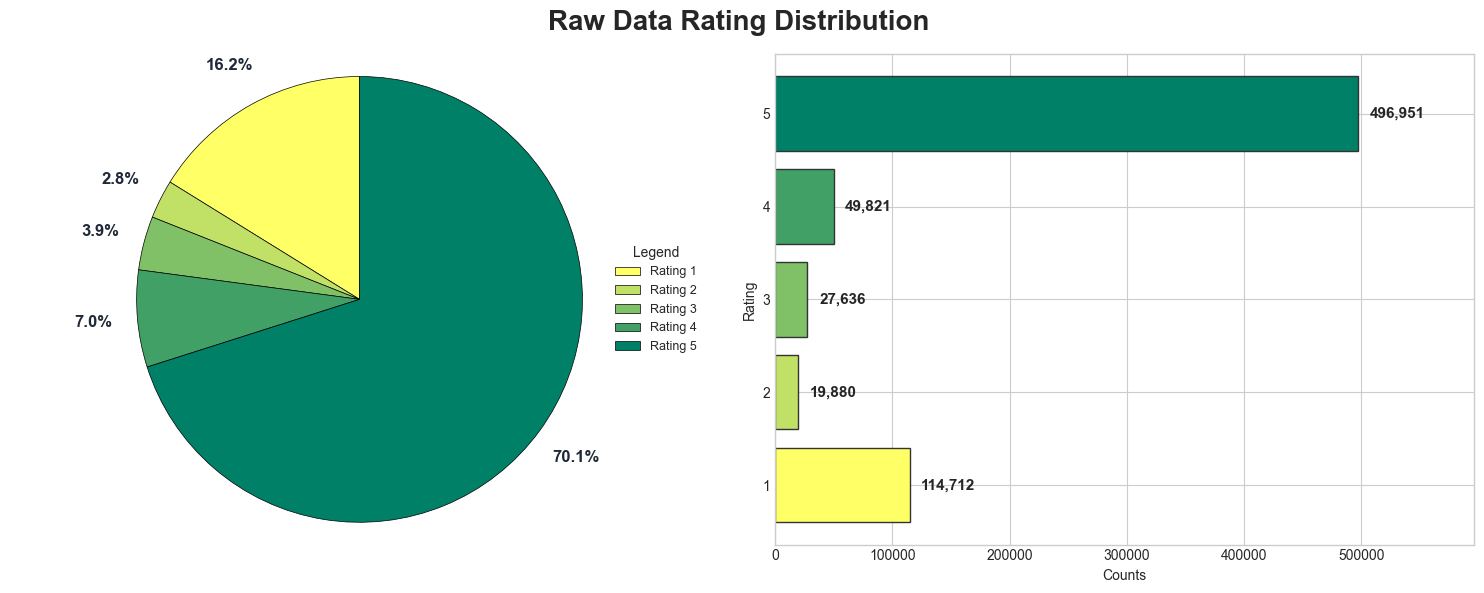

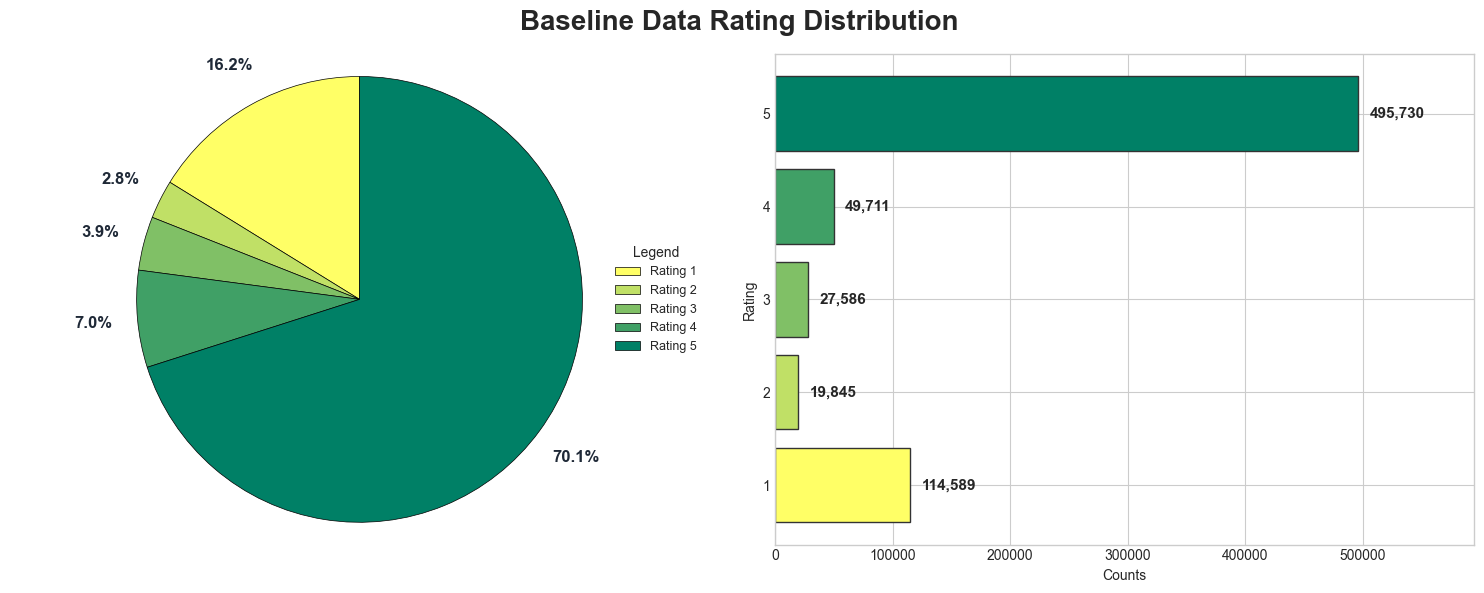

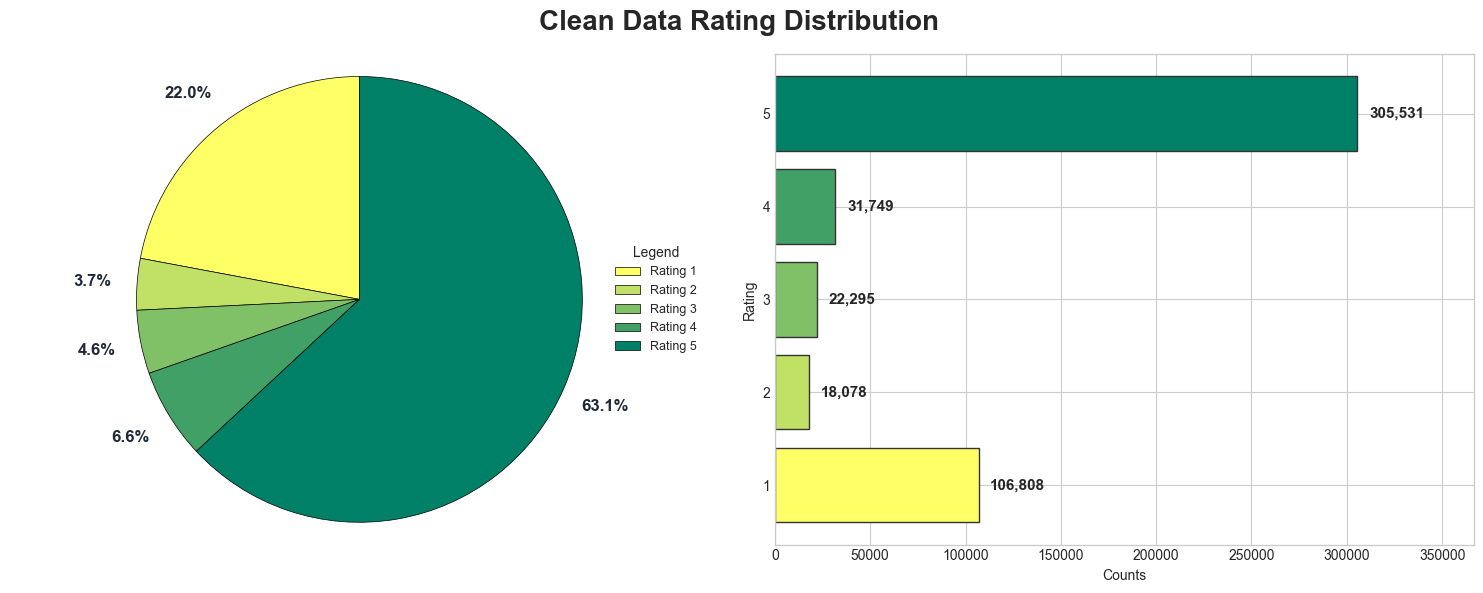

In [25]:
# Raw Data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
explore.plot_rating_distribution(df_raw, "Raw", axes[0], axes[1])
fig.suptitle("Raw Data Rating Distribution", fontsize=20, weight="bold")

plt.tight_layout()
plt.show()

# Baseline Data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
explore.plot_rating_distribution(df_baseline, "Baseline", axes[0], axes[1])
fig.suptitle("Baseline Data Rating Distribution", fontsize=20, weight="bold")

plt.tight_layout()
plt.show()

# Clean Data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
explore.plot_rating_distribution(df_clean, "Raw", axes[0], axes[1])
fig.suptitle("Clean Data Rating Distribution", fontsize=20, weight="bold")

plt.tight_layout()
plt.show()

# **Token Length Distribution**

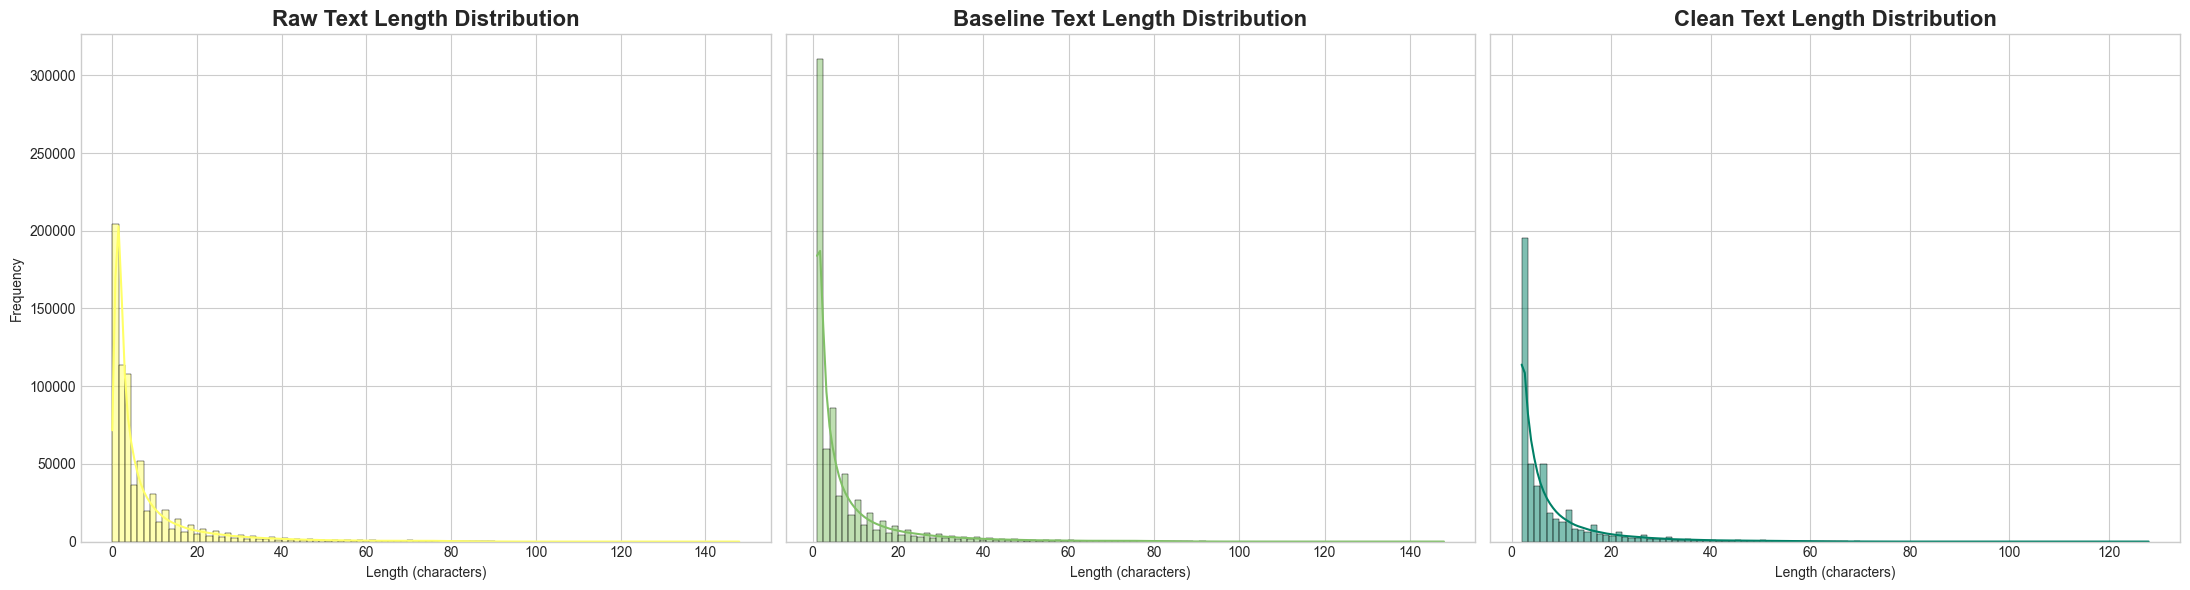

In [26]:
datasets = [
    ("Raw", df_raw.token_len, pie_colors[0]),
    ("Baseline", df_baseline.token_len, pie_colors[2]),
    ("Clean", df_clean.token_len, pie_colors[4]),
]

explore.compare_length_distribution(datasets)

All three distributions are heavy-tailed, showing that most reviews are short while a small number contain very long texts. The main difference between the raw, baseline, and clean versions lies in their range, not the overall shape. We can actually see the difference betrween raw and baseline with their range. The clean dataset extends farther on the x-axis because our emoji-mapping step converts each emoji into an alphabetic token like `[EMOJI_SMILE]`, turning what was originally one Unicode character into a much longer string. This increases character length while keeping the underlying distribution pattern essentially the same.

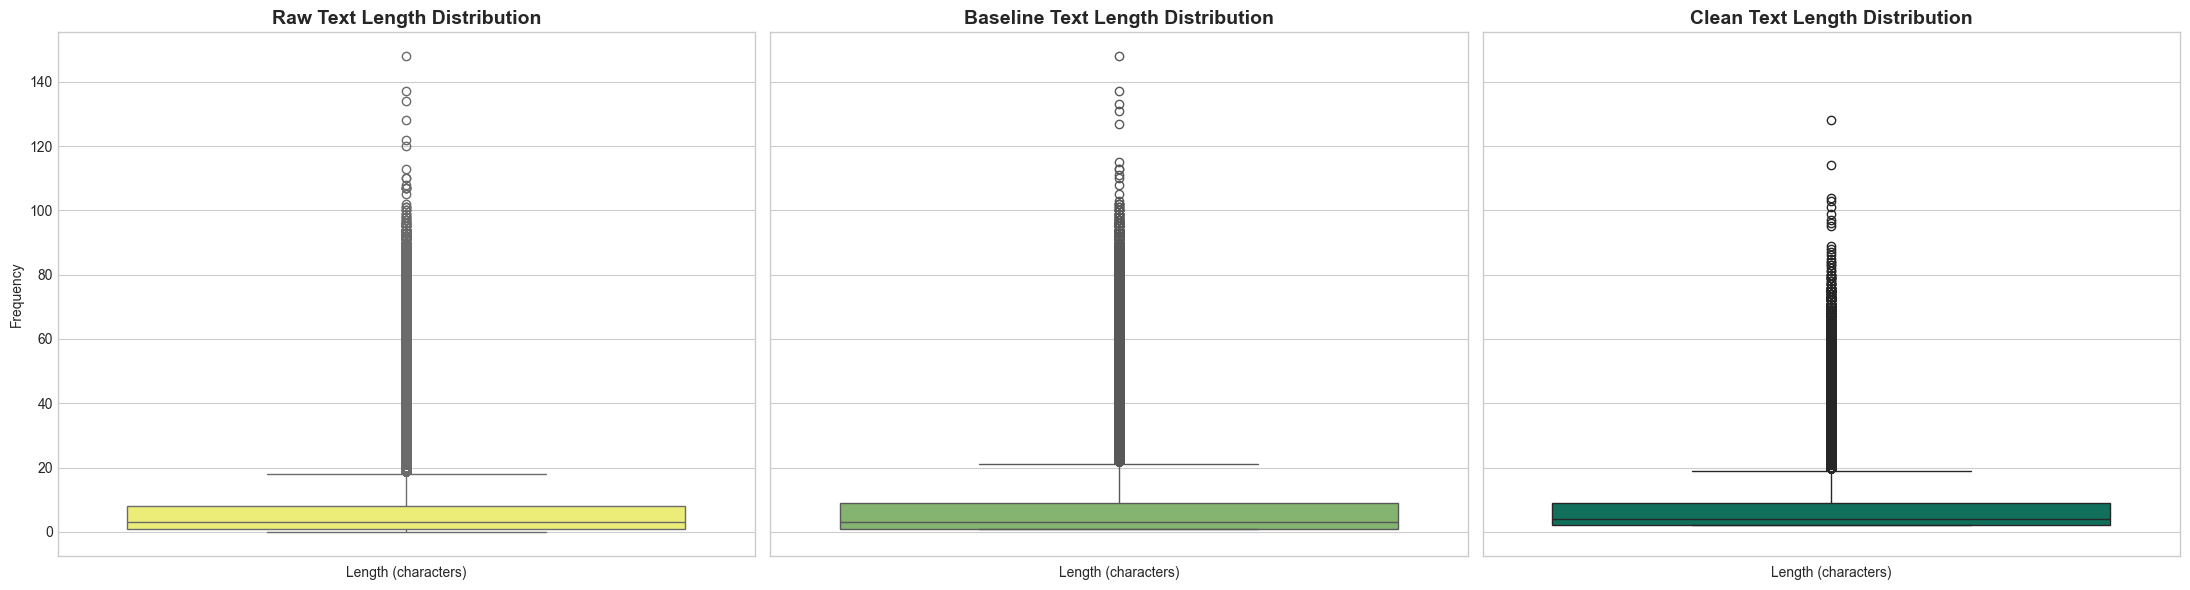

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=True)

for ax, (title, data, color) in zip(axes, datasets):
    sns.boxplot(
        data,
        color=color,
        ax=ax
    )

    ax.set_title(f"{title} Text Length Distribution", fontsize=14, weight="bold")
    ax.set_xlabel("Length (characters)")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

The boxplots show that all three versions of the data retain a heavy-tailed length distribution, but the spread tightens noticeably after applying the cleaning pipeline. Extreme outliers become more controlled because noisy artifacts such as URLs, emojis, repeated characters, and inconsistent punctuation are normalized or removed. The clean version still shows some long texts, mainly due to emoji tokens expanding into longer strings, but overall the distribution becomes more compact and structurally consistent, indicating that the cleaning pipeline is working effectively.

In [28]:
df_raw[df_raw.token_len == max(list(df_raw.token_len))]

,text,rating,date,char_len,token_len
631448,"Dear Toped, sebagai user sejak 2014 minta tolong dah, pembeli diberi kebebasan untuk pilihan bebas ongkir yang akan mereka pilih saya yakin kalau diberi pilihan antara antar aja (atau entar aja lebih tepatnya) atau si cepat pasti akan banyak yang pilih si cepat walau sedikit lebih mahal untuk mebayar ongkir diluar subsidinya saya sendiri sebagai seller memutuskan untuk menonaktifkan entar aja gegara berapa kali barang saya rusak di ekspedisi (beruntung pelanggan saya menyelesaikan dengan baik2 via personal sehingga tidak mempengaruhi rating penjualan) boleh belajar dari aplikasi sebelah.. subsidi bebas ongkir pilihannya murni ada di pelanggan. jadi pelanggat tetap bebas memilih ekspedisinya (kalau mau di limit pilihannya cuma si cepat maupun entar aja gpp.. tapi diberikan opsi sehingga kami bisa memilih tidak otomatis entar aja terus) sejumlah kecil seller bisa diajak kerjasama untuk menonaktifkan entar aja dalam proses pembelian, tapi sebagian besar tidak mau ribet mengatur di pilihan eksepedisinya",2,2021-01-24 13:00:01,1014.0,148


In [29]:
df_clean[df_clean.token_len == max(list(df_clean.token_len))]

,text,rating,date,char_len,token_len
126626,gb rhnrncjunyd unj dhdbj bgh ju tk ju tk nt tk nt ju tidak ku tk nt tk ku tk ku tk jyj ju tk ju tk ju uk ju tk tk nomor tk un football manager nur ulangan ju yu tk ku tk ku tujuh tk ju tk ju tk nt tk nt nt hahaha j uk tk ju tk ju football manager ju yu ju tk ku tk nt ju tahu ri ju tk sekolah dasar yajsj ju ju hahaha whatsapp tatsyhyjsj ut penulis hai football manager hahaha tiba wjn uk wjtsj imun jin football manager es un ju disk jokey uk j cn usj football manager football manager resmiejyzi tiba tk js uk ku football manager j raju uk tk rjusgsjrmjy fg ju bu tk,5,2022-09-11 10:27:26,568,128


In [ ]:
df_clean.drop(index=126626, inplace=True)
df_clean[df_clean.token_len == max(list(df_clean.token_len))]

,text,rating,date,char_len,token_len
281617,ki m umum mu kolom l o online om momod mum ulangan mnl h un h tv l hmm memang l on kmnm mengapa lebihmg hmm hmm un hahaha jk mj j jkjk lonjok mana hmm juju mini j hmm hmm hmm h sayang ym sayang kini jalan ki ik hmm hmm hmm hmm t mu hb bisa ynhu hmm hmm m hmm hmm j h h hahaha tentang nh hmm hmm hmm wn tidak for payudara v mbak hmm tidak tidak hmm sayang tv tidak sayang mbak hmm hmm benar b hmm 6 hmm tidak hmm iya tidak sayang i sayang h v mbak i kim nomor mi byhbn hmm hmm hmm b,3,2021-08-07 11:31:59,481,114


In [39]:
df_raw[df_raw.date=='2021-08-07 11:31:59']

,text,rating,date,char_len,token_len
406119,KKI m umum mmukolom lll ;o) oleh ol om momod mum uuull Lo n mnll di h UN h TV lll mm emang l on kmnnm ko n namun lebihmg mm mm UN ujian jK MJ KK JJ jkjjk UU+lonnjoK n mereka KK nimn mm Jujuk Mini j mm mm mm h BB by ym. BB nya kini; jl Ki iikkk k mm mm mm mm t mu hb .Bisa ynhhu by mm mm m mm mm j.. HH H imu ttg. Nh NN mm mm mm Wwwn! G for TT v MB mm ky.Gg GG mm BBb TV engga BB mb Dan MMM mm MMS b mm6y mm GG mm yhg BB i BB h.v. MB i Kim KK no mi km BByhbn mm mm mm b,3,2021-08-07 11:31:59,468.0,128


In [45]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import random

model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

def build_noise_detector(texts, model, sample_size=10000, percentile=99):
    """
    texts: list/series of baseline-cleaned text
    model: sentence transformer
    sample_size: jumlah sampel untuk baseline distribusi
    percentile: threshold quantile untuk noise filtering
    """

    # Filter text kosong
    texts = [t for t in texts if isinstance(t, str) and t.strip()]

    # Sampling
    if len(texts) > sample_size:
        texts = random.sample(texts, sample_size)

    print(f"Building noise detector with {len(texts)} samples...")

    # Embedding seluruh sample
    embs = model.encode(texts, convert_to_numpy=True, normalize_embeddings=True)

    # Centroid
    centroid = embs.mean(axis=0)

    # Similarity ke centroid
    sims = cosine_similarity(embs, centroid.reshape(1, -1)).reshape(-1)

    # Noise score
    scores = 1 - sims

    # Threshold konservatif
    threshold = np.percentile(scores, percentile)

    print(f"Threshold (p{percentile}): {threshold:.4f}")
    print("DONE — detector siap dipakai.")

    return centroid, threshold

def is_noise(text, model, centroid, threshold):
    if not isinstance(text, str) or not text.strip():
        return True  # treat empty text as noise

    v = model.encode([text], convert_to_numpy=True, normalize_embeddings=True)[0]
    sim = cosine_similarity([v], [centroid])[0][0]
    score = 1 - sim

    return score > threshold

centroid, threshold = build_noise_detector(
    df_baseline["text"].dropna().tolist(),
    model,
    sample_size=10000,     # aman & cepat
    percentile=99          # konservatif
)

Building noise detector with 10000 samples...
Threshold (p99): 0.8452
DONE — detector siap dipakai.


In [ ]:
from tqdm import tqdm
import numpy as np

def encode_batch(texts, model, batch_size=64):
    all_embs = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        emb = model.encode(
            batch,
            convert_to_numpy=True,
            normalize_embeddings=True,
            batch_size=batch_size
        )
        all_embs.append(emb)
    return np.vstack(all_embs)

texts = df_baseline["text"].fillna("").tolist()
embs = encode_batch(texts, model, batch_size=128)

<Axes: xlabel='date'>

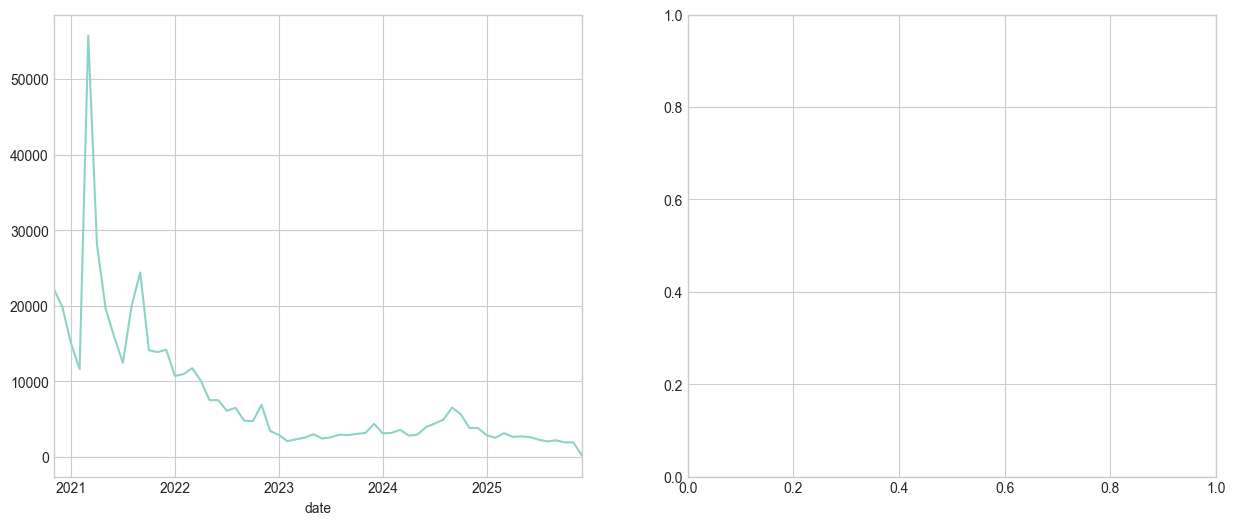

In [39]:
df_clean.date = df_clean.date.astype('datetime64[s]')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

df_clean.resample('M', on='date').size().plot(ax=ax1)